In [1]:
import pandas as pd
#twitter_path=r"C:\Users\chejesse\bitcoin project"
#twitter_path=r"/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/consolidation/"

In [ ]:
def get_twitter_trends():
    twitter_trends=pd.read_csv("/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/consolidation/twitter_series.csv")
    twitter_trends['timestamp']=pd.to_datetime(twitter_trends['timestamp']) 
    twitter_trends.set_index("timestamp",inplace=True)
    twitter_trends["fc_1_2"]=twitter_trends["follwers_count"]**(1/2)
    twitter_trends["fc_1_4"]=twitter_trends["follwers_count"]**(1/4)
    twitter_trends["wgtd_polarity_1"]=twitter_trends["follwers_count"]*twitter_trends["polarity"]
    twitter_trends["wgtd_polarity_1_2"]=twitter_trends["fc_1_2"]*twitter_trends["polarity"]
    twitter_trends["wgtd_polarity_1_4"]=twitter_trends["fc_1_4"]*twitter_trends["polarity"]
    twitter_trends_hourly = pd.DataFrame()
    twitter_trends_hourly['Hourly Polarity Mean'] = twitter_trends.polarity.resample('h').mean()
    twitter_trends_hourly['Hourly Polarity Weighted Mean 1'] = twitter_trends["wgtd_polarity_1"].resample('h').sum()/twitter_trends["follwers_count"].resample('h').sum()
    twitter_trends_hourly['Hourly Polarity Weighted Mean 1_2'] = twitter_trends["wgtd_polarity_1_2"].resample('h').sum()/twitter_trends["fc_1_2"].resample('h').sum()
    twitter_trends_hourly['Hourly Polarity Weighted Mean 1_4'] = twitter_trends["wgtd_polarity_1_4"].resample('h').sum()/twitter_trends["fc_1_4"].resample('h').sum()
    return twitter_trends_hourly

In [21]:
twitter_trends=pd.read_csv("/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/consolidation/twitter_series.csv")

In [22]:
twitter_trends['timestamp']=pd.to_datetime(twitter_trends['timestamp']) 

In [23]:
twitter_trends.dtypes

timestamp         datetime64[ns, UTC]
follwers_count                  int64
polarity                      float64
subjectivity                  float64
dtype: object

In [24]:
twitter_trends.set_index("timestamp",inplace=True)


In [25]:
twitter_trends.shape

(245860, 3)

In [26]:
twitter_trends

,follwers_count,polarity,subjectivity
timestamp,,,
2020-02-12 14:51:07+00:00,165,0.019048,0.745238
2020-03-31 01:35:01+00:00,1783,-0.600000,0.900000
2020-03-02 15:40:07+00:00,29856,0.500000,0.500000
2020-02-16 16:59:47+00:00,487,0.200000,0.525000
2020-04-01 13:14:45+00:00,24942,0.125000,0.400000
...,...,...,...
2020-03-09 01:05:49+00:00,273,0.000000,0.000000
2020-03-09 00:09:02+00:00,273,0.082273,0.345909
2020-02-17 16:58:13+00:00,267,0.000000,0.000000


In [27]:
twitter_trends["fc_1_2"]=twitter_trends["follwers_count"]**(1/2)

In [28]:
twitter_trends["fc_1_4"]=twitter_trends["follwers_count"]**(1/4)

In [29]:
twitter_trends["wgtd_polarity_1"]=twitter_trends["follwers_count"]*twitter_trends["polarity"]
twitter_trends["wgtd_polarity_1_2"]=twitter_trends["fc_1_2"]*twitter_trends["polarity"]
twitter_trends["wgtd_polarity_1_4"]=twitter_trends["fc_1_4"]*twitter_trends["polarity"]

In [30]:
twitter_trends_hourly = pd.DataFrame()
twitter_trends_hourly['Hourly Polarity Mean'] = twitter_trends.polarity.resample('h').mean()

In [31]:
twitter_trends_hourly

,Hourly Polarity Mean
timestamp,
2020-02-09 08:00:00+00:00,0.077215
2020-02-09 09:00:00+00:00,0.092508
2020-02-09 10:00:00+00:00,0.136894
2020-02-09 11:00:00+00:00,0.118374
2020-02-09 12:00:00+00:00,0.127048
...,...
2020-04-01 12:00:00+00:00,0.098950
2020-04-01 13:00:00+00:00,0.113653
2020-04-01 14:00:00+00:00,0.094207


In [32]:
twitter_trends_hourly['Hourly Polarity Weighted Mean 1'] = twitter_trends["wgtd_polarity_1"].resample('h').sum()/twitter_trends["follwers_count"].resample('h').sum()
twitter_trends_hourly['Hourly Polarity Weighted Mean 1_2'] = twitter_trends["wgtd_polarity_1_2"].resample('h').sum()/twitter_trends["fc_1_2"].resample('h').sum()
twitter_trends_hourly['Hourly Polarity Weighted Mean 1_4'] = twitter_trends["wgtd_polarity_1_4"].resample('h').sum()/twitter_trends["fc_1_4"].resample('h').sum()

In [33]:
twitter_trends_hourly

,Hourly Polarity Mean,Hourly Polarity Weighted Mean 1,Hourly Polarity Weighted Mean 1_2,Hourly Polarity Weighted Mean 1_4
timestamp,,,,
2020-02-09 08:00:00+00:00,0.077215,0.177412,0.133830,0.100191
2020-02-09 09:00:00+00:00,0.092508,0.119865,0.109187,0.100144
2020-02-09 10:00:00+00:00,0.136894,0.143959,0.142654,0.138648
2020-02-09 11:00:00+00:00,0.118374,0.093255,0.113416,0.118824
2020-02-09 12:00:00+00:00,0.127048,0.075334,0.110792,0.119858
...,...,...,...,...
2020-04-01 12:00:00+00:00,0.098950,0.112136,0.095914,0.095095
2020-04-01 13:00:00+00:00,0.113653,0.138477,0.116790,0.110462
2020-04-01 14:00:00+00:00,0.094207,0.035692,0.077222,0.088623


NameError: name 'baidu_daily_transformed' is not defined

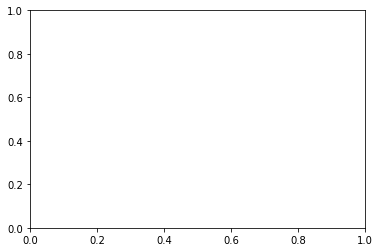

In [34]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.plot(baidu_daily_transformed.index, baidu_daily_transformed['Baidu Index'], 'b-')
#ax2.plot(baidu_daily_transformed.index, baidu_daily_transformed['Baidu Index'], 'b-')

ax1.set_xlabel('time')
ax1.set_ylabel('twitter polarity', color='g')
#ax2.set_ylabel('baidu trend', color='b')

plt.show()
plt.rcParams['figure.figsize'] = 24,10
plt.savefig('twitter polarity.png')

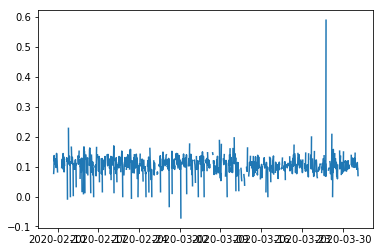

In [36]:
plt.plot(twitter_trends_hourly['Hourly Polarity Mean'])

/Users/ziyunchebn/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


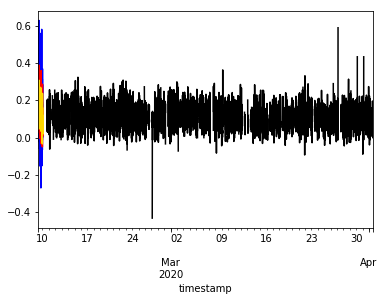

In [19]:
ax = plt.gca()

twitter_trends_5min['5M Polarity Mean'].plot(kind='line',x='timestamp',y='Mean',color='black',ax=ax)
twitter_trends_5min['5M Polarity Weighted Mean 1'][:200].plot(kind='line',x='name',y='Weighted Mean', color='blue', ax=ax)
twitter_trends_5min['5M Polarity Weighted Mean 1_2'][:200].plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
twitter_trends_5min['5M Polarity Weighted Mean 1_4'][:200].plot(kind='line',x='name',y='num_pets', color='gold', ax=ax)


/Users/ziyunchebn/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


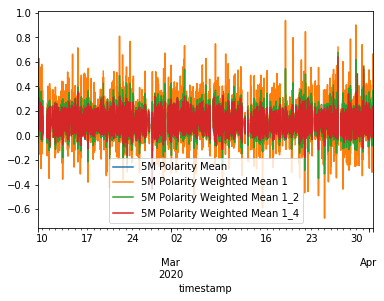

In [18]:
twitter_trends_5min.plot(kind='line')

In [37]:
twitter_trends_hourly[:200]

,Hourly Polarity Mean,Hourly Polarity Weighted Mean 1,Hourly Polarity Weighted Mean 1_2,Hourly Polarity Weighted Mean 1_4
timestamp,,,,
2020-02-09 08:00:00+00:00,0.077215,0.177412,0.133830,0.100191
2020-02-09 09:00:00+00:00,0.092508,0.119865,0.109187,0.100144
2020-02-09 10:00:00+00:00,0.136894,0.143959,0.142654,0.138648
2020-02-09 11:00:00+00:00,0.118374,0.093255,0.113416,0.118824
2020-02-09 12:00:00+00:00,0.127048,0.075334,0.110792,0.119858
...,...,...,...,...
2020-02-17 11:00:00+00:00,NaN,NaN,NaN,NaN
2020-02-17 12:00:00+00:00,0.125180,0.091496,0.122380,0.130079
2020-02-17 13:00:00+00:00,0.075900,0.083672,0.071980,0.073600


In [20]:
twitter_trends_5min

,5M Polarity Mean,5M Polarity Weighted Mean 1,5M Polarity Weighted Mean 1_2,5M Polarity Weighted Mean 1_4
timestamp,,,,
2020-02-09 08:50:00+00:00,0.079812,0.058294,0.064908,0.071637
2020-02-09 08:55:00+00:00,0.076566,0.183193,0.145894,0.107144
2020-02-09 09:00:00+00:00,0.043516,0.065675,0.063412,0.053342
2020-02-09 09:05:00+00:00,0.102947,0.078224,0.095228,0.101114
2020-02-09 09:10:00+00:00,0.036471,0.048053,0.054885,0.048260
...,...,...,...,...
2020-04-01 15:40:00+00:00,0.117737,0.176535,0.144203,0.126584
2020-04-01 15:45:00+00:00,0.160605,0.204586,0.172668,0.162430
2020-04-01 15:50:00+00:00,0.131035,0.182268,0.148430,0.137224
